 ## OPTICS

## Ordering Points To Identify the Clustering Structure

OPTICS stands for Ordering Points To Identify Cluster Structure. The OPTICS algorithm draws inspiration from the DBSCAN clustering algorithm. The difference ‘is  DBSCAN algorithm assumes the density of the clusters as constant, whereas the OPTICS algorithm allows a varying density of the clusters.

OPTICS adds two more terms to the concept of the DBSCAN algorithm, i.e.:

Core Distance
Reachability Distance

## Core Distance

It is the minimum value of radius required to classify a given point as a core point. If the given point is not the core point, then its core distance is not defined.

***Core Distance of an object P***

The core Distance of an object P is the smallest value of ɛ such that ɛ' neighborhood of P has at least MinPts objects.

For example, consider the following figure. The point p is displayed in the figure. ɛ has a value of 6, and MinPts is 5. We have to find the core distance of point p. According to the definition, the minimum value of radius that satisfies the MinPts criteria is called core distance. Now, if we consider the core distance of 3mm, i.e., the radius of 3, the criteria of MinPts is fulfilled.

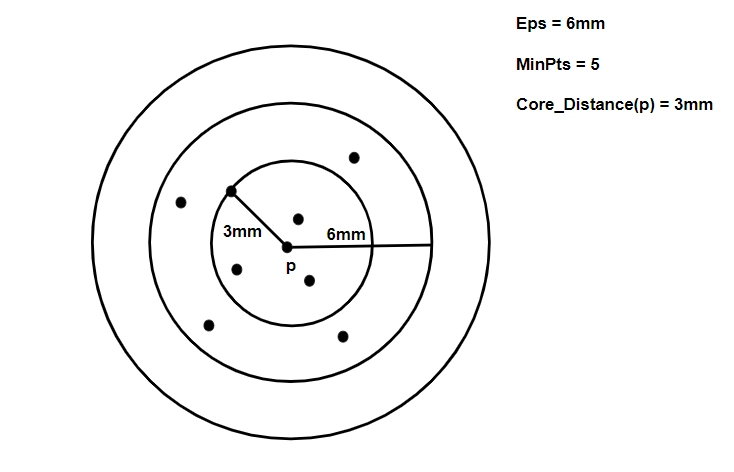

# Reachability Distance

It's determined in relation to another data item, q(Let). The maximum of the Euclidean Distance(or any other distance metric) between two points p and q, and the Core Distance of p is the Reachability distance between p and q. If q is not a Core point, the Reachability Distance is not specified.

***Calculating Reachability Distance Between Two Points***

First, we will calculate the reachability distance between p and q. In the figure below, we can see that point q is outside the core distance of point p, so to calculate the reachability distance between p and q is the euclidean distance between p and q, i.e., 7mm.

The reachability distance between p and r is the core distance of point p, as r lies within the core distance. Hence the reachability distance between p and r will be 3mm.

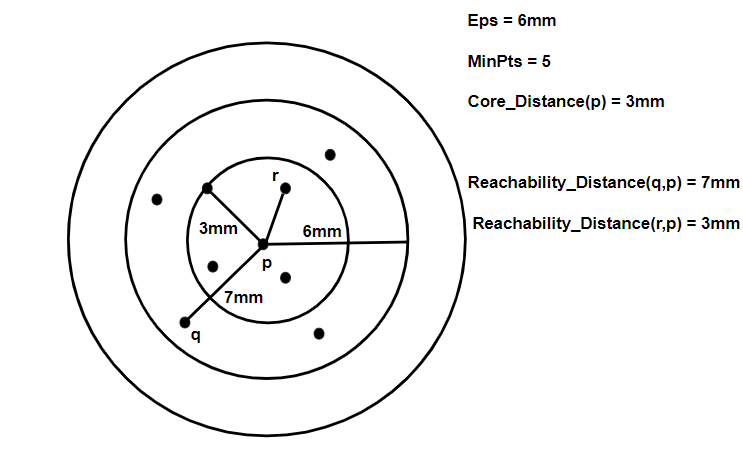

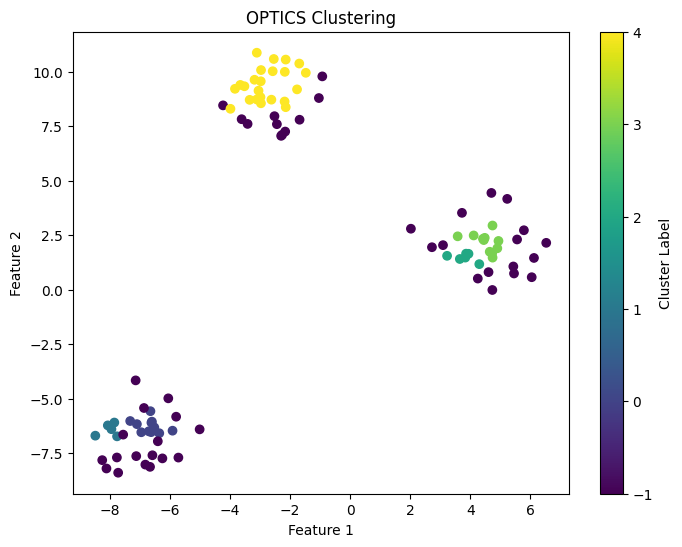

Core sample indices are not available.
Noise points: [ 0  1  3 13 19 27 29 30 33 34 36 38 39 40 42 48 50 54 57 58 59 60 62 63
 64 65 66 67 73 76 77 78 79 82 83 84 85 86 87 89 91 92 93 98]


In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs

# Generate synthetic data (you can replace this with your own dataset)
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Create OPTICS model
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

# Fit the model on the data
optics.fit(X)

# Access the clustering results
labels = optics.labels_  # Cluster labels for each point
reachability = optics.reachability_  # Reachability distances
ordering = optics.ordering_  # Ordering of points

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("OPTICS Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()

# Optional: Access core samples (dense regions)
if hasattr(optics, 'core_sample_indices_'):
    core_samples = optics.core_sample_indices_
    print("Core sample indices:", core_samples)
else:
    print("Core sample indices are not available.")

# Optional: Access noise points (if any)
noise_points = np.where(labels == -1)[0]
print("Noise points:", noise_points)
